<a href="https://colab.research.google.com/github/claudiaxpreda/SII/blob/main/SII_TRAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import pandas as pd
import numpy as np
import string
import nltk


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [8]:
WORKDIR = os.getcwd()

# DATASET_DIR = 'trac1-dataset/'
# DATASET_DIR2 = 'trac2-shared-task-dataset/release_files'

# TRAIN_FILE = 'agr_en_train.csv'
# VAL_FILE = 'agr_en_dev.csv'
# TEST_TW_FILE = 'agr_en_tw_gold.csv'
# TEST_FB_FILE = 'agr_en_fb_gold.csv'
# def get_train_files(name):
#   return WORKDIR + '/drive/MyDrive/SII/' + DATASET_DIR + 'english/' + name

# def get_test_files(name): 
#   return WORKDIR + '/drive/MyDrive/SII/' + DATASET_DIR + 'trac-gold-set/' + name


TRAIN_FILE = 'train_pre.csv'
VAL_FILE = 'val_pre.csv'
TEST_TW_FILE = 'test_fb_pre.csv'
TEST_FB_FILE = 'test_tw_pre.csv'

def get_files(name): 
  return WORKDIR + '/drive/MyDrive/SII/' + name

In [9]:

# def get_data(name, type):
#   if type == TRAIN:
#     return pd.read_csv(get_train_files(name))
#   else:
#     return pd.read_csv(get_test_files(name))


def get_data(name):
    return pd.read_csv(get_files(name))

In [10]:
# train_frame = get_data(TRAIN_FILE, TRAIN)
# val_frame = get_data(VAL_FILE, TRAIN)
# test_fb_frame = get_data(TEST_FB_FILE, TEST)
# test_tw_frame = get_data(TEST_TW_FILE, TEST)

train_frame = get_data(TRAIN_FILE)
val_frame = get_data(VAL_FILE)
test_fb_frame = get_data(TEST_FB_FILE)
test_tw_frame = get_data(TEST_TW_FILE)

print("Train set size: " + str(len(train_frame)))
print("Val set size: " + str(len(val_frame)))
print("Test facebook set size: " + str(len(test_fb_frame)))
print("Test twitter set size: " + str(len(test_tw_frame)))

Train set size: 11998
Val set size: 3000
Test facebook set size: 1256
Test twitter set size: 915


In [7]:
# def add_columns_name(data):
#   data.columns = ['unique_id', 'text', 'agression_level']

# add_columns_name(train_frame)
# add_columns_name(val_frame)
# add_columns_name(test_fb_frame)
# add_columns_name(test_tw_frame)

In [11]:
print("--- TRAIN, VAL")
print("NAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'NAG'),
    np.sum(val_frame.agression_level == 'NAG')))


print("OAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'OAG'),
    np.sum(val_frame.agression_level == 'OAG')))


print("CAG  {}, {}".format(
    np.sum(train_frame.agression_level == 'CAG'),
    np.sum(val_frame.agression_level == 'CAG')))

--- TRAIN, VAL
NAG  5051, 1233
OAG  2707, 711
CAG  4240, 1056


In [14]:
data = pd.concat([train_frame, val_frame])

139.57687691692226 215.0253154894112 6978


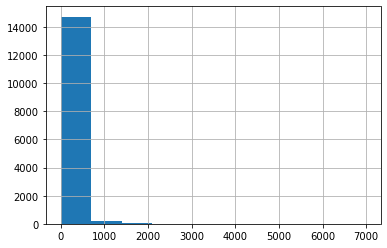

In [15]:
# Words length
lens = data.text.str.len()
print(lens.mean(), lens.std(), lens.max())
lens.hist()

In [16]:
data_analyze = data.drop(["unique_id"], axis=1)
data_analyze.iloc[1000:1012]

,text,agression_level,clean_text,tag
1000,..but govt want to take control over supreme c...,CAG,govt control supreme court lokpal effective ha...,1
1001,http://indianexpress.com/article/india/fatwa-i...,CAG,dear indian express feel sorry write journalis...,1
1002,... Why would this Muslim country ban people f...,CAG,would muslim country ban people muslim country...,1
1003,Nbcc best Infra company will declare rs 5 per ...,NAG,nbcc best infra company declare r share divide...,0
1004,INDIAN express is now BELOW STANDARD,CAG,indian express standard,1
1005,Indeed they are genuine and true Freedom Fight...,NAG,indeed genuine true freedom fighter,0
1006,but then we know where america stands today. w...,CAG,know america stand today whistle blower,1
1007,"Maulana is right,,,,,, it seems he understands...",CAG,maulana right seems understands muslim well be...,1
1008,Jude we elect our representative. Average turn...,OAG,jude elect representative average turnout voti...,2
1009,Please somebody tell her that CLEAN INDIA Miss...,NAG,please somebody tell clean india mission india...,0


87.0390870758316 136.1073281051844 4233.0


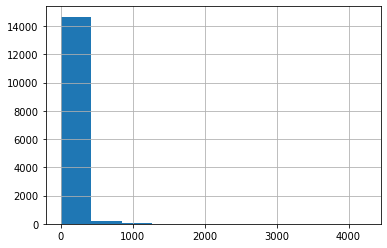

In [17]:
# Words length
lens = data.clean_text.str.len()
print(lens.mean(), lens.std(), lens.max())
lens.hist()

In [13]:
# def clean_text(text):
#   text = re.sub("@\S+", " ", text)
#   text = re.sub("https*\S+", " ", text)
#   text = re.sub("#\S+", " ", text)
#   text = re.sub("\'\w+", '', text)
#   text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
#   text = re.sub(r'\w*\d+\w*', '', text)
#   text = re.sub('\s{2,}', " ", text)
#   emoji_clean = re.compile("["
#                     u"\U0001F600-\U0001F64F"  # emoticons
#                     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                     u"\U00002702-\U000027B0"
#                     u"\U000024C2-\U0001F251"
#                     "]+", flags=re.UNICODE)
#   text = emoji_clean.sub(r'', text)

#   return text

# def lemm_data(comment):
#   lemm = WordNetLemmatizer()
#   lemm_words = [lemm.lemmatize(word.lower()) for word in comment] 
#   return lemm_words

# def remove_stopwords(text):
#   words = [word for word in text if not word in stopwords.words()]
#   return words 

# def apply_clean_data(data, tag, new_tag):
#   data[new_tag] = data[tag].apply(lambda z: clean_text(z))

# def apply_tokenization(data, tag):
#   data[tag] = data[tag].apply(lambda z: word_tokenize(z))

# def apply_lemm_data(data, tag):
#   data[tag]=data[tag].apply(lambda z: lemm_data(z))

# def apply_remove_stopwords(data, tag):
#   data[tag]=data[tag].apply(lambda z: remove_stopwords(z))

# def apply_join(data, tag):
#   data[tag]=data[tag].apply(lambda z: " ".join(z))


# def apply_text_processing(data):
#   apply_clean_data(data, 'text', 'clean_text')
#   apply_tokenization(data, 'clean_text')
#   apply_lemm_data(data, 'clean_text')
#   apply_remove_stopwords(data, 'clean_text')
#   apply_join(data, 'clean_text')

In [18]:
import tensorflow as tf
import tensorflow_addons as tfa

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

print(gpus)



# with tf.device('/device:GPU:0'):
#   apply_text_processing(train_frame)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [43]:
test_tw_frame.head()

,unique_id,text,agression_level,clean_text,tag
0,facebook_corpus_msr_422473,So now we know. The women should be under the ...,NAG,know woman veil dumb country made think cool,0
1,facebook_corpus_msr_341422,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे,NAG,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ जाओगे,0
2,facebook_corpus_msr_481654,Do you think markets are gonna be sideways til...,NAG,think market gon sideways result,0
3,facebook_corpus_msr_427757,Jago Urjut Jago....\nSave common people from\n...,NAG,jago urjut jago save common people reducing re...,0
4,facebook_corpus_msr_469689,The point of demonetization is to stop use of ...,NAG,point demonetization stop use cash way india i...,0


In [41]:
val_frame.text.iloc[3]

'Modi ho ya Manmohan singh saala yeh log kuch ny karta hai sirf vote ka lia 56 ka seena dikahata hai'

In [16]:
# apply_text_processing(val_frame)
# val_frame.clean_text.iloc[5]

In [17]:
# add_columns_name(test_fb_frame)
# add_columns_name(test_tw_frame)
# #apply_text_processing(test_fb_frame)
# test_fb_frame

In [18]:
# apply_text_processing(test_tw_frame)
# test_tw_frame

In [19]:
# def create_tag(data):
#     data['tag'] = np.where(data['agression_level'] == 'NAG', 0, 2)
#     data['tag'] = np.where(data['agression_level'] == 'CAG', 1, data.tag)

In [20]:
# create_tag(train_frame)
# create_tag(val_frame)
# create_tag(test_fb_frame)
# create_tag(test_tw_frame)
# val_frame.head(5)

In [ ]:
val_frame.head()

In [22]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Dropout, Activation, Input, SpatialDropout1D, concatenate
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, AveragePooling1D, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import text, sequence



max_features = 20000
maxlen = 250

data = pd.concat([train_frame, val_frame])
data_train = pd.concat([train_frame, test_fb_frame])
data_test = pd.concat([test_tw_frame, val_frame])

fit_list = train_frame.text.fillna('other').values
list_sentences_train = train_frame.clean_text.fillna('other').values
list_sentences_val = val_frame.clean_text.fillna('other').values
list_sentences_test_fb = test_fb_frame.clean_text.fillna('other').values
lis_sentences_test_tw = test_tw_frame.clean_text.fillna('other').values



In [23]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_frame.tag.values, num_classes=3)
Y_val = to_categorical(val_frame.tag.values)
Y_test_fb = to_categorical(test_fb_frame.tag.values, num_classes=3)
Y_test_tw = to_categorical(test_tw_frame.tag.values, num_classes=3)

print(Y_train.shape)

(11998, 3)


In [24]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(fit_list))

list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_val = tokenizer.texts_to_sequences(list_sentences_val)

list_tokenized_test_fb = tokenizer.texts_to_sequences(list_sentences_test_fb)
list_tokenized_test_tw = tokenizer.texts_to_sequences(lis_sentences_test_tw)

X_train = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
X_val = sequence.pad_sequences(list_tokenized_val, maxlen=maxlen)
X_te_fb = sequence.pad_sequences(list_tokenized_test_fb, maxlen=maxlen)
X_te_tw = sequence.pad_sequences(list_tokenized_test_tw, maxlen=maxlen)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip glove*.zip

In [ ]:
!ls
!pwd

In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('/content/glove.6B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


In [28]:
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('/content/drive/MyDrive/SII/embeddings', 'wb'))

In [48]:
embed_size = 50


def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open('/content/glove.6B.50d.txt'))


all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std



word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector





/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [50]:
def get_model_1():
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable = False)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.25)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(3, activation="softmax")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')])


    return model

def get_model_2():
  embed_size = 50
  model = Sequential()
  model.add(Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False))
  model.add(LSTM(units = 64, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
  model.add(LSTM(units = 64, dropout = 0.2, recurrent_dropout = 0.2))
  model.add(Dropout(0.1))

  model.add(Dense(units = 3, activation = 'softmax'))
  
  model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')])
  
  return model


def get_model_3():

  inp = Input(shape=(maxlen,))

  x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
  x = SpatialDropout1D(0.35)(x)

  x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(x)
  x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)

  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  x = concatenate([avg_pool, max_pool])

  out = Dense(3, activation='softmax')(x)

  model = Model(inp, out)


  model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tfa.metrics.F1Score(num_classes=3, average='macro')])

  return model

get_model_2().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 50)          1000000   
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 64)          29440     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 195       
Total params: 1,062,659
Trainable params: 62,659
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

model_1 = get_model_2()
batch_size = 128
epochs = 10

# X_t, X_v,Y_t, Y_v = train_test_split(X_train, Y_train, test_size=0.33)
# file_path="weights_base.best.hdf5"
# checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


early = EarlyStopping(monitor="val_loss", mode="min", patience=10)


callbacks_list = [early] #early

with tf.device('/device:GPU:0'):
  history = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=batch_size, epochs=epochs, callbacks=callbacks_list)


In [32]:
import pickle
with open(WORKDIR + "/drive/MyDrive/SII/train_lstm_v5", 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [ ]:
y_test = model.evaluate(X_te_fb, Y_test_fb, batch_size=64)


In [34]:
model.save("/content/drive/MyDrive/SII/LSTM_model_glove_final.h5")


In [ ]:
y_test = model.evaluate(X_te_fb, Y_test_fb, batch_size=64)

In [45]:
get_model_2().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 128)         117248    
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 387       
Total params: 2,249,219
Trainable params: 249,219
Non-trainable params: 2,000,000
_________________________________________________________________
